# **Customer Segmentation Using RFM Analysis and K-Means Clustering**


In this project, I performed customer segmentation by combining the **RFM (Recency, Frequency, Monetary)** method with K-Means clustering. The goal was to identify distinct customer groups based on purchasing behavior, using RFM scoring and unsupervised learning techniques. The dataset contains three years of retail sales data and is ideal for retail analytics and marketing strategy design.




## **Overview of Customer Segmentation**

Customer segmentation is a powerful strategy that helps businesses understand their customer base and tailor their communication and services to different customer groups. Nearly every product or service-based company collects purchase data, which can be leveraged for segmentation. These insights can then be applied to marketing campaigns to boost sales and improve customer retention.


One of the most popular techniques is **RFM analysis**, which enables personalized offers and marketing strategies.

- Recency – How recently a customer made a purchase

- Frequency – How often they purchase

- Monetary – How much money they spend



Each customer is scored on these three parameters, typically on a scale from 1 to 4, where 4 indicates the highest value and 1 the lowest. The combined RFM score is then used to classify customers into meaningful segments.



## **Dataset**

The dataset used is publicly available on Kaggle:

 https://www.kaggle.com/kyanyoga/sample-sales-data


It contains transactional data from a retail company over a span of three years.


## **Project Workflow**


The project is structured into six key steps:

1. Importing Libraries and Loading the Dataset

2. Data Cleaning and Preparation

3. Exploratory Data Analysis (EDA) and Visualization

4. RFM Analysis and Scoring

5. Customer Segmentation using K-Means Clustering

6. Result Interpretation and Business Insights




## Import libriaries and data

In [1]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Date and time utilities
import datetime as dt

# Statistical analysis
import scipy.stats as stats
import statsmodels.formula.api as sm

# Machine learning - Clustering
from sklearn.cluster import KMeans

# 3D plotting
from mpl_toolkits.mplot3d import Axes3D


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
df = pd.read_csv('/content/drive/My Drive/Datasets/sales_data_sample.csv', encoding='unicode_escape')
df.head()


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


**First observations:**

In [8]:
df.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


Shape of data:

In [10]:
df.shape

(2823, 25)

## Data cleaning

The dataset contains some unnecessary columns, such as ADDRESSLINE1, ADDRESSLINE2, POSTALCODE, TERRITORY, and PHONE.

As a first step, I remove these columns to simplify the data.

Next, I process the PRODUCTINITIAL column by extracting only the first three characters to group the products more effectively.

In [11]:
# remove columns
data=['ADDRESSLINE1','ADDRESSLINE2','POSTALCODE', 'TERRITORY', 'PHONE', 'CITY' , 'STATE','CONTACTFIRSTNAME', 'CONTACTLASTNAME', 'MONTH_ID']
df.drop(data,axis=1,inplace=True)

In [12]:
# regrouping product code
df['PRODUCTINITIAL'] = df['PRODUCTCODE'].str[:3]
df.drop('PRODUCTCODE',axis=1,inplace=True)

In [14]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,YEAR_ID,PRODUCTLINE,MSRP,CUSTOMERNAME,COUNTRY,DEALSIZE,PRODUCTINITIAL
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2003,Motorcycles,95,Land of Toys Inc.,USA,Small,S10
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,2003,Motorcycles,95,Reims Collectables,France,Small,S10
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,2003,Motorcycles,95,Lyon Souveniers,France,Medium,S10
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,2003,Motorcycles,95,Toys4GrownUps.com,USA,Medium,S10
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,2003,Motorcycles,95,Corporate Gift Ideas Co.,USA,Medium,S10


## Basic data analysis

Checking unique values in each column:

In [15]:
for column in df:
    print(f'Number of unique values in {column}:', df[column].nunique())

Number of unique values in ORDERNUMBER: 307
Number of unique values in QUANTITYORDERED: 58
Number of unique values in PRICEEACH: 1016
Number of unique values in ORDERLINENUMBER: 18
Number of unique values in SALES: 2763
Number of unique values in ORDERDATE: 252
Number of unique values in STATUS: 6
Number of unique values in QTR_ID: 4
Number of unique values in YEAR_ID: 3
Number of unique values in PRODUCTLINE: 7
Number of unique values in MSRP: 80
Number of unique values in CUSTOMERNAME: 92
Number of unique values in COUNTRY: 19
Number of unique values in DEALSIZE: 3
Number of unique values in PRODUCTINITIAL: 8


Checking the missing values in data:

In [16]:
df.isnull().sum()

,0
ORDERNUMBER,0
QUANTITYORDERED,0
PRICEEACH,0
ORDERLINENUMBER,0
SALES,0
ORDERDATE,0
STATUS,0
QTR_ID,0
YEAR_ID,0
PRODUCTLINE,0


Checking unique values in YEAR_ID:

In [17]:
df['YEAR_ID'].unique()

array([2003, 2004, 2005])

After initial observations one can see that:
- There are no duplicate records in the dataset.

- No missing values were found across the columns.

- The data includes 92 unique clients, on whom I will perform an  **RFM (Recency, Frequency, Monetary)** analysis.

### Data visualization

As a first step, I create visualizations to gain deeper insights into the data and uncover potential patterns or trends:

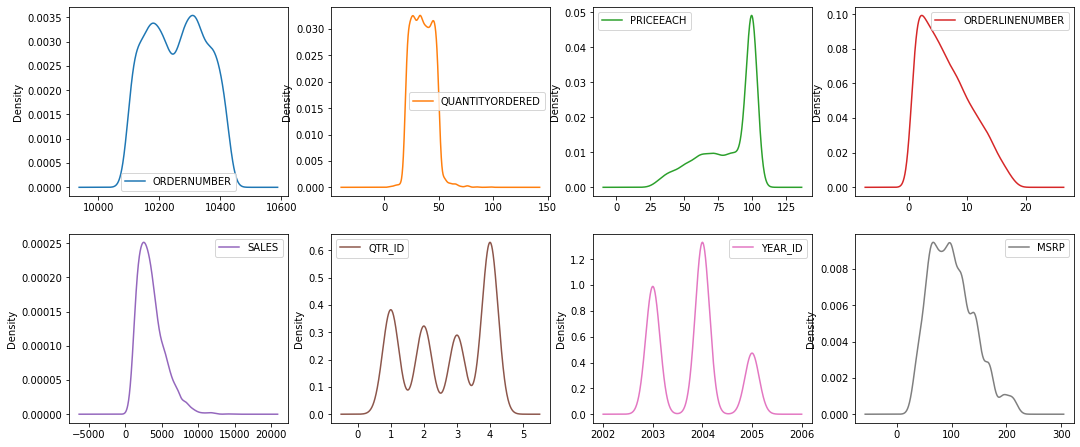

In [ ]:
plt.rcParams['figure.figsize'] = [18, 16]
df.plot(kind="density", subplots=True, layout=(4,4), sharex=False, sharey=False)
plt.show()

The majority of the data is concentrated in the years 2003 and 2004, as indicated by the YEAR_ID column.
Sales activity is mostly within a specific price range, although there are a few noticeable outliers in both SALES and QUANTITYORDERED.

From the visualizations, it's clear that some variables, such as PRICEEACH and ORDERLINENUMBER, are skewed. Additionally, features like PRICEEACH, ORDERLINENUMBER, and MSRP show significant discrepancies in their value distributions, which may impact further analysis and modeling.

Checking unique values in STATUS:

In [18]:
df['STATUS'].value_counts()

,count
STATUS,
Shipped,2617
Cancelled,60
Resolved,47
On Hold,44
In Process,41
Disputed,14


The STATUS variable indicates the type of order status. The majority of the orders are marked as "Shipped", making it the most common status in the dataset.

Below is a plot showing the distribution of sales statuses:

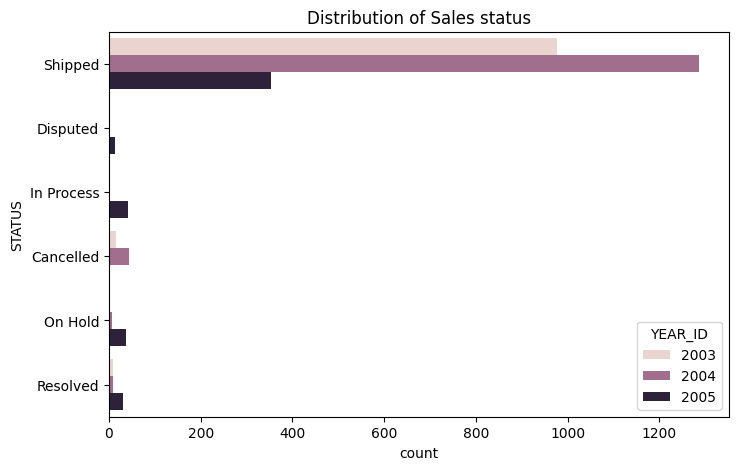

In [19]:
plt.rcParams['figure.figsize'] = [8, 5]
sns.countplot(y='STATUS',data=df,hue='YEAR_ID', )
plt.title('Distribution of Sales status');

 Comparing Sales for each year:

In [20]:
df.groupby(['YEAR_ID'])['SALES'].sum()

,SALES
YEAR_ID,
2003,3516979.54
2004,4724162.60
2005,1791486.71


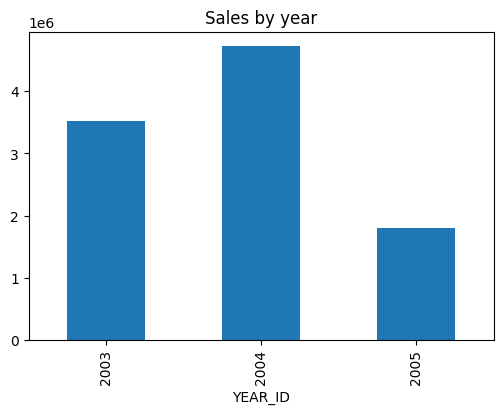

In [21]:
df.groupby(['YEAR_ID'])['SALES'].sum().plot(kind='bar', figsize=(6,4), title='Sales by year');

The highest number of sales was recorded in 2004, showing an increase compared to 2003.

Data for 2005 appears to be incomplete, suggesting that it may not cover the full year and should be treated with caution in any time-based analysis.



Comparing sales for each year (Quarter Wise):

In [22]:
sales = df.groupby(['YEAR_ID','QTR_ID']).agg({'SALES': lambda x: x.sum()})
sales

SALES
YEAR_ID QTR_ID            
2003    1        445094.69
        2        562365.22
        3        649514.54
        4       1860005.09
2004    1        833730.68
        2        766260.73
        3       1109396.27
        4       2014774.92
2005    1       1071992.36
        2        719494.35

In [23]:
sales.reset_index(inplace=True)
sales.head()

,YEAR_ID,QTR_ID,SALES
0,2003,1,445094.69
1,2003,2,562365.22
2,2003,3,649514.54
3,2003,4,1860005.09
4,2004,1,833730.68


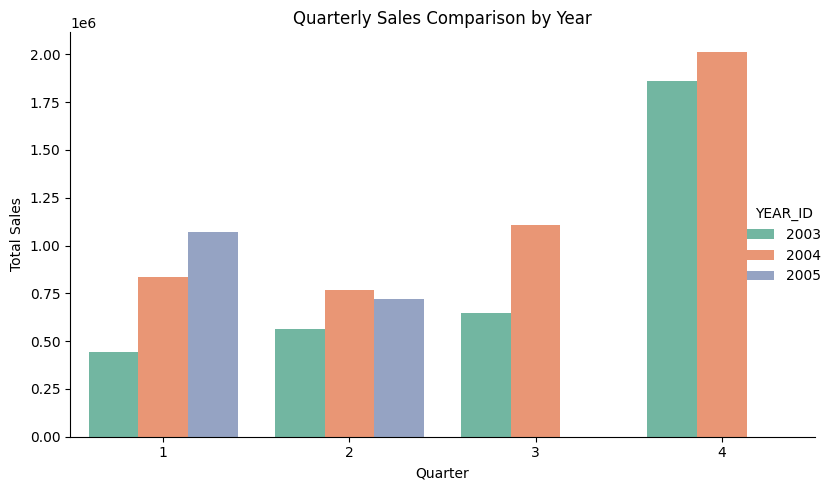

In [26]:
# Set default figure size
plt.rcParams['figure.figsize'] = [8, 5]

# Updated syntax using catplot (instead of deprecated factorplot)
sns.catplot(
    data=sales,
    x='QTR_ID',
    y='SALES',
    hue='YEAR_ID',
    kind='bar',
    height=5,
    aspect=1.5,
    palette='Set2'
)

plt.title('Quarterly Sales Comparison by Year')
plt.xlabel('Quarter')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

## RFM Analysis

To perform an RFM (Recency, Frequency, Monetary) analysis, I focus on the key columns required to evaluate customer behavior. These are:

- CUSTOMERNAME – identifies each customer

- ORDERNUMBER – used to count the frequency of purchases

- ORDERDATE – to calculate recency based on the most recent order

- SALES – represents the monetary value of each transaction

I’ll use these columns to calculate the RFM metrics for each unique customer.

In [27]:
col =['CUSTOMERNAME', 'ORDERNUMBER', 'ORDERDATE', 'SALES']
RFM = df[col]
RFM.head()

,CUSTOMERNAME,ORDERNUMBER,ORDERDATE,SALES
0,Land of Toys Inc.,10107,2/24/2003 0:00,2871.00
1,Reims Collectables,10121,5/7/2003 0:00,2765.90
2,Lyon Souveniers,10134,7/1/2003 0:00,3884.34
3,Toys4GrownUps.com,10145,8/25/2003 0:00,3746.70
4,Corporate Gift Ideas Co.,10159,10/10/2003 0:00,5205.27


In [28]:
RFM.shape

(2823, 4)

In RFM clustering, it's common practice to consider only transactions from the last 12 months, as older transactions may no longer reflect the current behavior of customers, the relevance of products, or the state of the business.

To apply this logic, we need to define a reference point for "today." In this analysis, I will use the most recent order date in the dataset as the reference date. This approach ensures that the recency metric is calculated relative to the latest available activity.



In [29]:
RFM['ORDERDATE'] = pd.to_datetime(RFM['ORDERDATE'], errors='coerce')

<ipython-input-29-e93d32424d64>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RFM['ORDERDATE'] = pd.to_datetime(RFM['ORDERDATE'], errors='coerce')


In [30]:
RFM.head()

,CUSTOMERNAME,ORDERNUMBER,ORDERDATE,SALES
0,Land of Toys Inc.,10107,2003-02-24,2871.00
1,Reims Collectables,10121,2003-05-07,2765.90
2,Lyon Souveniers,10134,2003-07-01,3884.34
3,Toys4GrownUps.com,10145,2003-08-25,3746.70
4,Corporate Gift Ideas Co.,10159,2003-10-10,5205.27


In [31]:
RFM['ORDERDATE'].max()

Timestamp('2005-05-31 00:00:00')

In [32]:
now = dt.datetime(2005,5,31)

**Create the RFM Table:**

Calculating Recency

**Recency** measures how long it has been since a customer last made a purchase. It is calculated as the number of days between the most recent purchase in the dataset and each customer's most recent order.

First, we define the reference date as the latest ORDERDATE in the dataset:

In [37]:
rfm_df = RFM.groupby('CUSTOMERNAME').agg({'ORDERDATE': lambda x: (now - x.max()).days})

To complete the RFM table, I calculate the **Frequency** (how often a customer has made a purchase) and the **Monetary Value** (the total amount spent by each customer). This is done using the groupby() method:

In [38]:
rfm_df['Frequency'] = RFM.groupby(by=['CUSTOMERNAME'])['ORDERNUMBER'].count()

In [39]:
rfm_df['MonetaryValue'] = RFM.groupby(by='CUSTOMERNAME').agg({'SALES': 'sum'})

In [40]:
rfm_df.head()

,ORDERDATE,Frequency,MonetaryValue
CUSTOMERNAME,,,
"AV Stores, Co.",195,51,157807.81
Alpha Cognac,64,20,70488.44
Amica Models & Co.,264,26,94117.26
"Anna's Decorations, Ltd",83,46,153996.13
Atelier graphique,187,7,24179.96


Renaming 'ORDERDATE' value to 'Recency':

In [41]:
rfm_df.rename(columns={'ORDERDATE': 'Recency'}, inplace=True)
rfm_df.head()

,Recency,Frequency,MonetaryValue
CUSTOMERNAME,,,
"AV Stores, Co.",195,51,157807.81
Alpha Cognac,64,20,70488.44
Amica Models & Co.,264,26,94117.26
"Anna's Decorations, Ltd",83,46,153996.13
Atelier graphique,187,7,24179.96


## Model: RFM Scoring + K-Means Clustering

In this approach, I apply **RFM scoring** to classify customers based on their behavior and then use **K-Means clustering** to segment them into meaningful groups.

### **Transformation of Variables for RFM Scoring**

To prepare the data for clustering, I first assign scores to each RFM component based on percentiles. This transforms the continuous RFM values into **ordinal variables**.

- No scaling is needed, since the scoring already standardizes the values.

- The scores range from 1 to 4, where a higher score indicates a better customer from the seller’s perspective.

### **Scoring Rules**:
- **Recency**:
Customers who purchased more recently are more valuable.


- **Frequency**:
Customers who purchase more often are more valuable.

- **Monetary**:
Customers who spent more are more valuable.


 ➤ Higher value = Higher score

In [42]:
r = pd.qcut(rfm_df.Recency, 4, labels = list(range(0,4)))

In [43]:
f = pd.qcut(rfm_df.Frequency, 4, labels = list(range(0,4)))

In [44]:
m = pd.qcut(rfm_df.MonetaryValue, 4, labels = list(range(0,4)))

In [45]:
rfm_df_cutted = pd.DataFrame({'Recency' : r, 'Frequency' : f, 'MonetaryValue' : m})
rfm_df_cutted

,Recency,Frequency,MonetaryValue
CUSTOMERNAME,,,
"AV Stores, Co.",2,3,3
Alpha Cognac,0,1,1
Amica Models & Co.,3,1,2
"Anna's Decorations, Ltd",1,3,3
Atelier graphique,2,0,0
...,...,...,...
"Vida Sport, Ltd",3,2,2
Vitachrome Inc.,2,1,2
"Volvo Model Replicas, Co",2,0,1


In [46]:
rfm_df_raw = rfm_df_cutted.values

### K-Means Clustering Model

**K-Means** is an unsupervised machine learning algorithm used for **clustering** data points into distinct groups based on feature similarity.

In this algorithm, the number of clusters K is specified in advance. The algorithm then:

1. Randomly initializes K cluster centroids.

2. Assigns each data point to the nearest centroid based on distance (usually Euclidean).

3. Recomputes the centroids based on the current cluster assignments.

4. Repeats the process until the centroids no longer change significantly (convergence).

### Finding the Optimal Number of Clusters: The Elbow Method
To determine the best value for **K**, I use the **elbow method**. This involves:

- Running K-Means for a range of K values.

- Calculating the **within-cluster sum of squares (WCSS)** for each K.

- Plotting K vs. WCSS and identifying the “elbow point” – the value of K where adding more clusters doesn’t significantly improve model fit.

In [47]:
group = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(rfm_df_raw)
    group.append([i, kmeans.inertia_])
groups = pd.DataFrame(group, columns = ['number_of_group', 'inertia'])

In [48]:
groups

,number_of_group,inertia
0,1,344.304348
1,2,160.909613
2,3,107.023375
3,4,76.998687
4,5,61.806805
5,6,48.611500
6,7,43.445202
7,8,40.853535
8,9,40.496248
9,10,26.236500


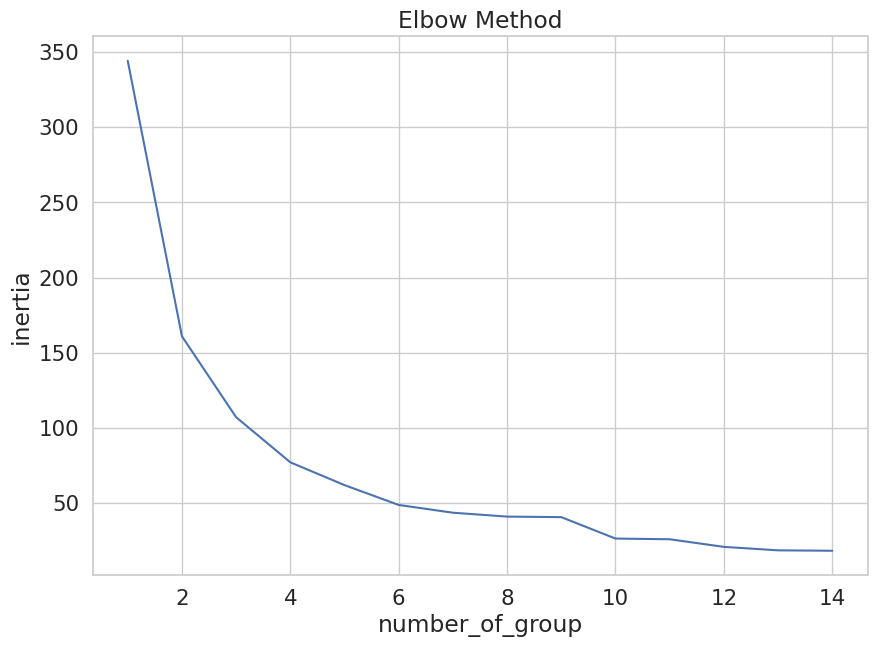

In [49]:
plt.figure(figsize=(10,7))
sns.set(font_scale=1.4, style="whitegrid")
sns.lineplot(data = groups, x = 'number_of_group', y = 'inertia').set(title = "Elbow Method")
plt.show()

Based on the Elbow Plot, the most noticeable "elbows" appear at K = 4 and K = 6, indicating potential optimal cluster counts.

To ensure the best segmentation, I will test both values and compare the clustering results for interpretability and performance.

Function to visualize grouping:

In [50]:
def plots_model():
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    # Group data by 'groups'
    grouped_data = rfm_df.groupby('groups')

    # Plot each group separately
    for i, (group_name, group_data) in enumerate(grouped_data):
        xs = group_data['Recency']
        ys = group_data['MonetaryValue']
        zs = group_data['Frequency']
        ax.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='w', label=group_name)

    ax.set_xlabel('Recency')
    ax.set_zlabel('Frequency')
    ax.set_ylabel('MonetaryValue')
    plt.title('Visualization of created groups')
    plt.legend()
    plt.show()

**First model - 6 groups:**

In [51]:
model_1 = KMeans(n_clusters=6, init='k-means++', max_iter=300)
groups = model_1.fit_predict(rfm_df_raw)
rfm_df_cutted['groups'] = groups
rfm_df['groups'] = groups

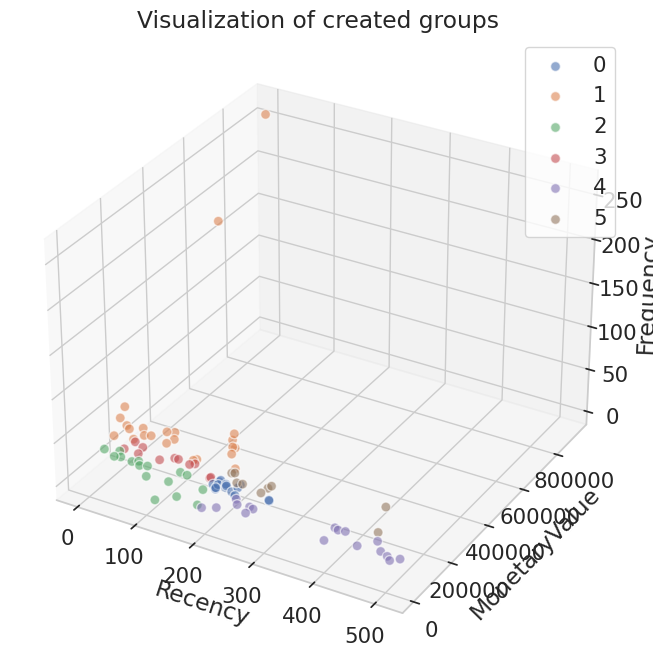

In [52]:
plots_model()

Distribution of the size of individual groups:

In [53]:
print((rfm_df.groups.value_counts(normalize = True, sort = True) * 100).to_string())

groups
1    25.000000
4    18.478261
2    17.391304
0    17.391304
3    11.956522
5     9.782609


Statistics for the whole set:

In [54]:
rfm_df.agg(['mean'])

,Recency,Frequency,MonetaryValue,groups
mean,181.826087,30.684783,109050.313587,2.184783


Statistics for individual groups:

In [55]:
rfm_df.groupby('groups').agg(['mean'])

,Recency,Frequency,MonetaryValue
,mean,mean,mean
groups,,,
0,215.375000,23.312500,82203.807500
1,88.608696,57.521739,204351.832609
2,88.000000,18.312500,62768.398125
3,103.454545,28.727273,103478.149091
4,359.176471,14.588235,51764.517059
5,288.000000,30.000000,110524.997778


The sum of the values for each group:

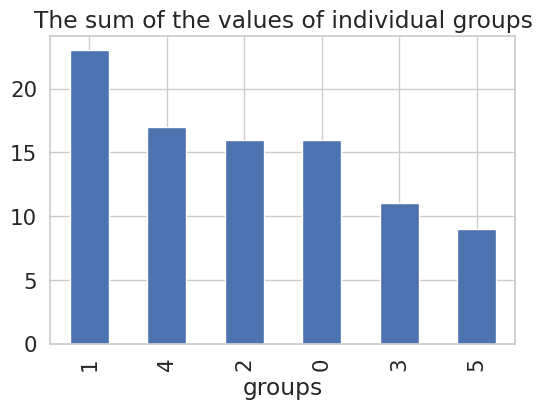

In [56]:
rfm_df.groups.value_counts().plot(kind='bar', figsize=(6,4), title='The sum of the values of individual groups');

**Second model - 4 groups:**

In [57]:
model_1 = KMeans(n_clusters=4, init='k-means++', max_iter=300)
groups = model_1.fit_predict(rfm_df_raw)
rfm_df['groups'] = groups

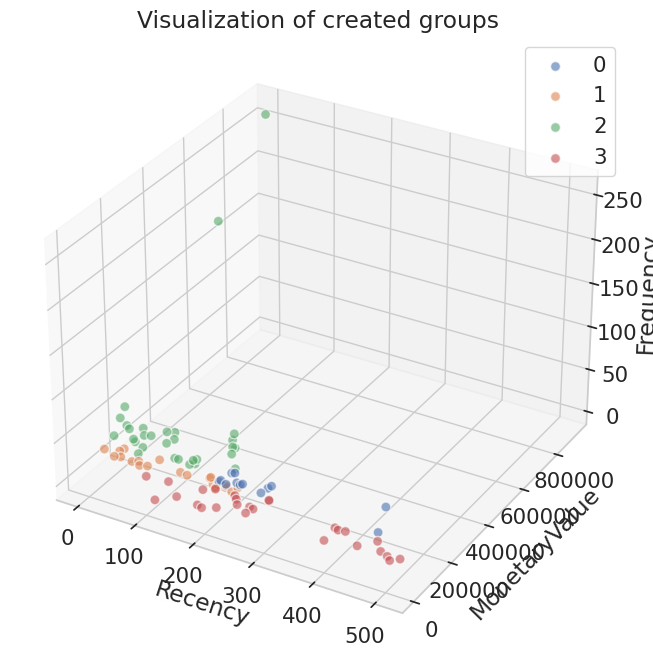

In [58]:
plots_model()

Distribution of the size of individual groups:

In [59]:
print((rfm_df.groups.value_counts(normalize = True, sort = True) * 100).to_string())

groups
2    32.608696
3    29.347826
1    23.913043
0    14.130435


Statistics for the whole set:

In [60]:
rfm_df.agg(['mean'])

,Recency,Frequency,MonetaryValue,groups
mean,181.826087,30.684783,109050.313587,1.771739


Distribution of the size of individual groups:

In [61]:
rfm_df.groupby('groups').agg(['mean'])

,Recency,Frequency,MonetaryValue
,mean,mean,mean
groups,,,
0,262.615385,28.461538,105714.786923
1,123.181818,23.363636,80780.230000
2,89.966667,51.100000,182199.256333
3,292.777778,15.037037,52414.587778


The sum of the values for each group:

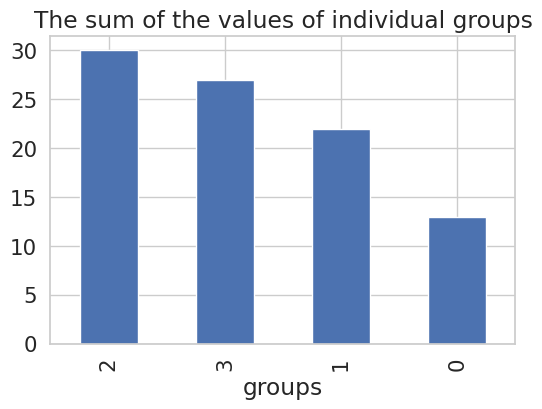

In [62]:
rfm_df.groups.value_counts().plot(kind='bar', figsize=(6,4), title='The sum of the values of individual groups');

From above received calculations I choose segmentation for four groups.

In [63]:
rfm_df.head()

,Recency,Frequency,MonetaryValue,groups
CUSTOMERNAME,,,,
"AV Stores, Co.",195,51,157807.81,2
Alpha Cognac,64,20,70488.44,1
Amica Models & Co.,264,26,94117.26,0
"Anna's Decorations, Ltd",83,46,153996.13,2
Atelier graphique,187,7,24179.96,3


Function to assigned segment name to each value:

In [64]:
def name(row):
    segment_mapping = {0: 'departing', 1: 'active', 2: 'inactive'}
    return segment_mapping.get(row, 'new')

Adding column SegmentName to DataFrame:

In [65]:
rfm_df['SegmentName'] = rfm_df['groups'].apply(name)

In [66]:
rfm_df.head()

,Recency,Frequency,MonetaryValue,groups,SegmentName
CUSTOMERNAME,,,,,
"AV Stores, Co.",195,51,157807.81,2,inactive
Alpha Cognac,64,20,70488.44,1,active
Amica Models & Co.,264,26,94117.26,0,departing
"Anna's Decorations, Ltd",83,46,153996.13,2,inactive
Atelier graphique,187,7,24179.96,3,new


In [68]:
# Save recommendations to a CSV file
rfm_df.to_csv('Segmentation\customers_segments.csv', index=False)

### 📊 Description of Results  
#### 🧠 Interpretation of the Resulting Customer Segments

Based on the RFM analysis, I chose a segmentation into **four clusters**. The resulting groups can be interpreted as follows:

- **Group 0:**  
  Customers who haven’t shopped recently, but used to buy **moderately often** and **spent large amounts**.  
  → *“Former best customers – Departing”*

- **Group 1:**  
  Customers who have shopped **recently**, buy **frequently**, and spend **a lot**.  
  → *“Best customers – Active”*

- **Group 2:**  
  Customers who have not shopped for a **long time**, buy **very rarely**, and spend **small amounts**.  
  → *“Old and random customers – Inactive”*

- **Group 3:**  
  Customers who made a **recent purchase**, but shop **infrequently** and spend **very little**.  
  → *“New and random customers – New”*

---

### 💡 Marketing Strategies by Segment

#### 🔝 Group 1 – Best Customers (Active)  
**Goal:** Retention and loyalty  
**Strategies:**
- Exclusive discounts or early access to sales  
- Loyalty programs or VIP tiers  
- Personalized thank-you messages or surprise gifts

---

#### 🌱 Group 3 – New Customers (Random & Recent)  
**Goal:** Nurture into loyal customers  
**Strategies:**
- Welcome emails or onboarding campaigns  
- Introductory offers for future purchases  
- Highlight bestsellers or customer favorites

---

#### 👋 Group 0 – Former Best Customers (Departing)  
**Goal:** Win them back  
**Strategies:**
- Win-back email campaigns (e.g. “We miss you!” promotions)  
- Feedback surveys to understand drop-off  
- Re-engagement incentives (e.g. time-limited offers)

---

#### 💤 Group 2 – Old & Inactive Customers  
**Goal:** Re-evaluate value or reawaken interest  
**Strategies:**
- Consider low-effort reactivation campaigns  
- Test re-engagement offers with low cost/high perceived value  
- If ROI is low, focus resources elsewhere
